<a href="https://colab.research.google.com/github/negarhonarvar/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disease_symptom_and_patient_profile_dataset.csv')
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
data.shape

(349, 10)

In [ ]:
lblenc=LabelEncoder()
zero_one_valued = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Outcome Variable']
for col in zero_one_valued:
  data[col] = lblenc.fit_transform(data[col])
# positive values , yes's and female are 1, the rest of them are 0
data['Blood Pressure']=lblenc.fit_transform(data['Blood Pressure'])
data['Cholesterol Level']=lblenc.fit_transform(data['Cholesterol Level'])
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
4,Asthma,1,1,0,1,25,1,2,2,1


In [ ]:
len(data['Disease'].unique())

116

In [ ]:
# data['Disease'] = data['Disease'].astype('category')
# data['Diseases'] = data['Disease'].cat.codes

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
disease = enc.fit_transform(data[['Disease']])
enc_data = pd.DataFrame(disease, columns=enc.get_feature_names_out(['Disease']))
# enc_data = pd.DataFrame(enc.fit_transform(data[['Diseases']]).toarray(), columns=onehot.get_feature_names_out(['Disease']))
data = data.drop('Disease', axis=1)
OneHotData = data.join(enc_data)
OneHotData.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_Acne,...,Disease_Tonsillitis,Disease_Tourette Syndrome,Disease_Tuberculosis,Disease_Turner Syndrome,Disease_Typhoid Fever,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus
0,1,0,1,1,19,0,1,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0,25,0,2,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0,25,0,2,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,25,1,2,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,1,25,1,2,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
y= OneHotData["Outcome Variable"]
# x,y=np.arange(250).reshape((2, 125))
# chose the test size based on scikit learn documantation
x_train, x_test, y_train, y_test = train_test_split(OneHotData, y, test_size=0.33)

In [ ]:
def knn(x_train, x_test):
    k = 7
    max_labels = []

    for _, test_row in x_test.iterrows():
        distances = [(np.linalg.norm(np.array(train_row[:-1]) - np.array(test_row[:-1])), train_row.iloc[-1])
                     for _, train_row in x_train.iterrows()]

        sorted_list = sorted(distances, key=lambda x: x[0])[:k]

        # Find the most common label
        maximum = max(set([label for _, label in sorted_list]), key=[label for _, label in sorted_list].count)
        max_labels.append(maximum)

    return np.array(max_labels)

In [ ]:
prediction = knn(x_train , x_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.41379310344827586

In [ ]:
sort = []
for i in range(0, len(y_test)):
    sort.append(i)
test = y_test.set_axis(sort)

In [ ]:
Y_test = []
y_pred= []
for i in range(len(prediction)):
    if prediction[i] == 1.0:
        y_pred.append(1)
    else:
        y_pred.append(0)

    if test[i] == 1.0:
        Y_test.append(1)
    else:
        Y_test.append(0)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

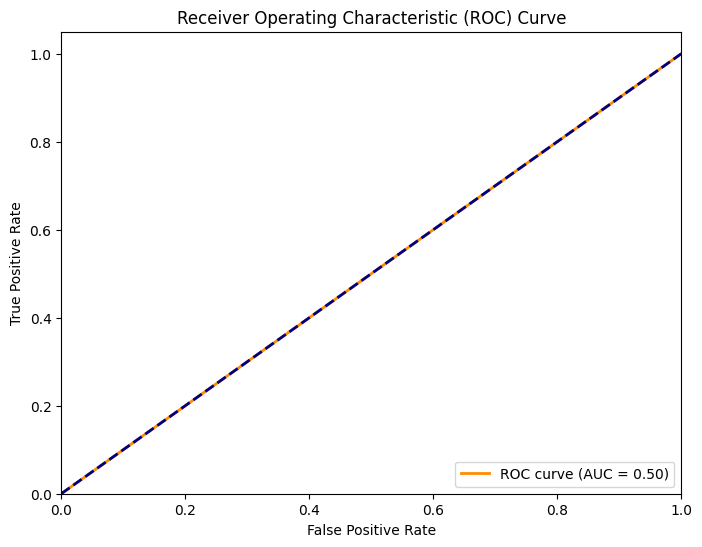

In [ ]:
fpr, tpr, threshholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()